In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('purchaseData.csv')
print("hello")

hello


In [127]:
data

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [128]:
A=data.drop(columns=['Customer','Payment (Rs)'])
B=data['Payment (Rs)']
rank_A=np.linalg.matrix_rank(A)
print("the rank of A is : ",rank_A)

#pseudo inverse
pseudo_inverse=np.linalg.pinv(A)
#multiplying this pseudo inverse with B gives us the X (i.e., the paramenters of the equation)
X=pseudo_inverse @ B
print(X)

print(np.dot(A.iloc[0,:],X))



the rank of A is :  3
[ 1. 55. 18.]
386.0000000000002


# A3

In [129]:
def classify(val):
    if val>200:
        return 1
    return 0
data['Customer category']=data['Payment (Rs)'].apply(classify)
data
train=data.drop(columns=['Customer','Customer category']).iloc[0:5,:]
test=data.drop(columns=['Customer','Customer category']).iloc[5:10,:]
B=data['Customer category'].iloc[0:5]
pseudo_inverse=np.linalg.pinv(train)
#multiplying this pseudo inverse with B gives us the X (i.e., the paramenters of the equation)
X=pseudo_inverse @ B
print("yes")
print(X)
for i in range(0,5):
    print(round(np.dot(test.iloc[i,:],X)))
data

yes
[-0.01382408 -0.00952612  0.03007677  0.00362152]
0
1
1
0
1


,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Customer category
0,C_1,20,6,2,386,1
1,C_2,16,3,6,289,1
2,C_3,27,6,2,393,1
3,C_4,19,1,2,110,0
4,C_5,24,4,2,280,1
5,C_6,22,1,5,167,0
6,C_7,15,4,2,271,1
7,C_8,18,4,2,274,1
8,C_9,21,1,4,148,0
9,C_10,16,2,4,198,0


# A4

In [130]:
data=pd.read_csv('IRCTCdata.csv')
data

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,"2,081.85","2,092.00","2,126.90","2,065.05",1.67M,0.20%
1,"Jun 28, 2021",Jun,Mon,"2,077.75","2,084.00","2,112.45","2,068.40",707.73K,0.43%
2,"Jun 25, 2021",Jun,Fri,"2,068.85","2,084.35","2,088.50","2,053.10",475.82K,-0.20%
3,"Jun 24, 2021",Jun,Thu,"2,072.95","2,098.00","2,098.00","2,066.00",541.51K,-0.26%
4,"Jun 23, 2021",Jun,Wed,"2,078.25","2,102.00","2,111.40","2,072.00",809.62K,-0.23%
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,"1,397.40","1,410.00","1,411.00","1,390.05",480.21K,-0.24%
245,"Jul 06, 2020",Jul,Mon,"1,400.75","1,405.50","1,415.50","1,394.00",614.93K,-0.31%
246,"Jul 03, 2020",Jul,Fri,"1,405.10","1,415.00","1,425.00","1,398.00",599.49K,-0.51%
247,"Jul 02, 2020",Jul,Thu,"1,412.35","1,440.00","1,467.80","1,395.30",2.16M,3.62%


In [131]:
data['Price']=data['Price'].str.replace(',','').astype('float')
mean=np.mean(data[data['Day']=="Wed"]['Price'])
variance=np.var(data[data['Day']=="Wed"]['Price'])
(mean,variance)

(1550.7060000000001, 56780.759163999974)

In [132]:
data['Price']=data['Price'].replace(',','').astype('float')
mean=np.mean(data[data['Month']=="Apr"]['Price'])
variance=np.var(data[data['Month']=="Apr"]['Price'])
(mean,variance)

(1698.9526315789474, 4620.904861495845)

In [133]:
data['Chg%']=data['Chg%'].str.replace('%','').astype('float')
total=data['Chg%'].shape[0]
pvals=0
nvals=total
for i in data['Chg%']:
    if i>0:
        pvals+=1
        nvals-=1
probabilityOfLoss=nvals/(pvals+nvals)
probabilityOfLoss

0.5020080321285141

In [134]:
wed_data=data[data['Day']=='Wed']
pwed=wed_data[wed_data['Chg%']>0].shape[0]
total_wed=wed_data.shape[0]
profitWed=pwed/(total_wed)
profitWed

0.42

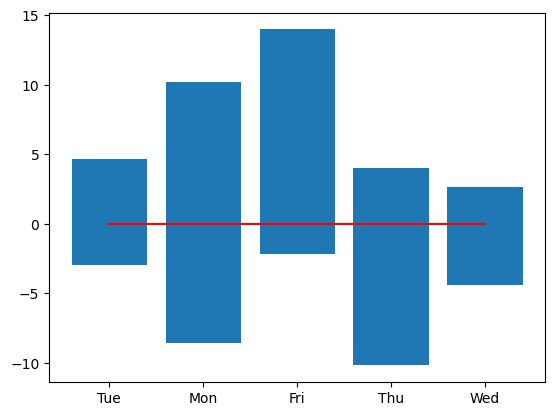

In [135]:
plt.bar(data['Day'],data['Chg%'])
plt.plot([i for i in range(5)],[0 for _ in range(5)],c='red')

# A5

In [136]:
data=pd.read_csv('Thyroid.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,NO CONDITION


In [137]:
from sklearn.preprocessing import LabelEncoder
# Ordinal variables
ordinal_variables = [
    "TSH measured", "T3 measured", "TT4 measured", "T4U measured", "FTI measured"
]

# Nominal variables
nominal_variables = [
    "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", 
    "sick", "pregnant", "thyroid surgery", "I131 treatment", 
    "query hypothyroid", "query hyperthyroid", "lithium", 
    "goitre", "tumor", "hypopituitary", "psych", 
    "TBG measured", "referral source", "Condition"
]

label_encoder = LabelEncoder()
for col in ordinal_variables:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

data = pd.get_dummies(data, columns=nominal_variables, drop_first=True)
data


,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013,29,1,0.3,0,?,0,?,0,?,...,False,False,False,True,False,False,False,False,False,False
1,840801014,29,1,1.6,1,1.9,1,128,0,?,...,False,False,False,True,False,False,False,False,False,False
2,840801042,41,0,?,0,?,0,?,0,?,...,False,False,False,True,False,False,False,False,False,False
3,840803046,36,0,?,0,?,0,?,0,?,...,False,False,False,True,False,False,False,False,False,False
4,840803047,32,0,?,0,?,0,?,0,?,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,0,?,0,?,1,64,1,0.83,...,False,False,False,True,False,False,False,False,False,False
9168,870119023,22,0,?,0,?,1,91,1,0.92,...,False,False,False,True,False,False,False,False,False,False
9169,870119025,69,0,?,0,?,1,113,1,1.27,...,False,False,False,False,False,False,False,False,False,False
9170,870119027,47,0,?,0,?,1,75,1,0.85,...,False,False,False,True,False,False,False,False,False,False


In [138]:
data.info()
change=list(data.columns)[0:13]
for col in change:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Record ID                    9172 non-null   int64 
 1   age                          9172 non-null   int64 
 2   TSH measured                 9172 non-null   int32 
 3   TSH                          9172 non-null   object
 4   T3 measured                  9172 non-null   int32 
 5   T3                           9172 non-null   object
 6   TT4 measured                 9172 non-null   int32 
 7   TT4                          9172 non-null   object
 8   T4U measured                 9172 non-null   int32 
 9   T4U                          9172 non-null   object
 10  FTI measured                 9172 non-null   int32 
 11  FTI                          9172 non-null   object
 12  TBG                          9172 non-null   object
 13  sex_F                        9172

,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013,29,1,0.3,0,NaN,0,NaN,0,NaN,...,False,False,False,True,False,False,False,False,False,False
1,840801014,29,1,1.6,1,1.9,1,128.0,0,NaN,...,False,False,False,True,False,False,False,False,False,False
2,840801042,41,0,NaN,0,NaN,0,NaN,0,NaN,...,False,False,False,True,False,False,False,False,False,False
3,840803046,36,0,NaN,0,NaN,0,NaN,0,NaN,...,False,False,False,True,False,False,False,False,False,False
4,840803047,32,0,NaN,0,NaN,0,NaN,0,NaN,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,0,NaN,0,NaN,1,64.0,1,0.83,...,False,False,False,True,False,False,False,False,False,False
9168,870119023,22,0,NaN,0,NaN,1,91.0,1,0.92,...,False,False,False,True,False,False,False,False,False,False
9169,870119025,69,0,NaN,0,NaN,1,113.0,1,1.27,...,False,False,False,False,False,False,False,False,False,False
9170,870119027,47,0,NaN,0,NaN,1,75.0,1,0.85,...,False,False,False,True,False,False,False,False,False,False


In [139]:
numeric_columns=list(data.select_dtypes(include=['number']).columns)
for col in numeric_columns:
    data[col]=data[col].fillna(np.nanmedian(data[col]))
numeric_columns

['Record ID',
 'age',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG']

In [140]:
numeric_columns=list(data.select_dtypes(include=['number']).columns)
numeric_columns

['Record ID',
 'age',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG']

In [141]:
Q1=data[numeric_columns].quantile(0.25)
Q3=data[numeric_columns].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(Record ID       8.349560e+08
 age            -9.500000e+00
 TSH measured    1.000000e+00
 TSH            -2.275000e+00
 T3 measured    -1.500000e+00
 T3              9.500000e-01
 TT4 measured    1.000000e+00
 TT4             3.400000e+01
 T4U measured    1.000000e+00
 T4U             6.000000e-01
 FTI measured    1.000000e+00
 FTI             4.850000e+01
 TBG             2.600000e+01
 dtype: float64,
 Record ID       8.761640e+08
 age             1.145000e+02
 TSH measured    1.000000e+00
 TSH             5.365000e+00
 T3 measured     2.500000e+00
 T3              2.950000e+00
 TT4 measured    1.000000e+00
 TT4             1.780000e+02
 T4U measured    1.000000e+00
 T4U             1.320000e+00
 FTI measured    1.000000e+00
 FTI             1.725000e+02
 TBG             2.600000e+01
 dtype: float64)

In [142]:
outliers_iqr=((data[numeric_columns]<lower_limit)|(data[numeric_columns]>upper_limit))
outliers_iqr

,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG
0,False,False,False,False,False,False,True,False,True,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,True,False,True,False,True,False,True
3,False,False,True,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,False,False,True,False,False,False,False,False,False,False,False,False,False
9168,False,False,True,False,False,False,False,False,False,False,False,False,False
9169,False,False,True,False,False,False,False,False,False,False,False,False,False
9170,False,False,True,False,False,False,False,False,False,False,False,False,False


In [143]:
outliers = data[outliers_iqr.any(axis=1)]
outliers

,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013,29,1,0.3,0,1.9,0,104.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
1,840801014,29,1,1.6,1,1.9,1,128.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
2,840801042,41,0,1.4,0,1.9,0,104.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
3,840803046,36,0,1.4,0,1.9,0,104.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
4,840803047,32,0,1.4,0,1.9,0,104.0,0,0.96,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,0,1.4,0,1.9,1,64.0,1,0.83,...,False,False,False,True,False,False,False,False,False,False
9168,870119023,22,0,1.4,0,1.9,1,91.0,1,0.92,...,False,False,False,True,False,False,False,False,False,False
9169,870119025,69,0,1.4,0,1.9,1,113.0,1,1.27,...,False,False,False,False,False,False,False,False,False,False
9170,870119027,47,0,1.4,0,1.9,1,75.0,1,0.85,...,False,False,False,True,False,False,False,False,False,False


In [144]:
mean=data[numeric_columns].mean()
variance=data[numeric_columns].var()
mean,variance

(Record ID       8.529473e+08
 age             7.355582e+01
 TSH measured    9.081989e-01
 TSH             4.867869e+00
 T3 measured     7.160925e-01
 T3              1.950577e+00
 TT4 measured    9.518099e-01
 TT4             1.084738e+02
 T4U measured    9.117968e-01
 T4U             9.746396e-01
 FTI measured    9.125600e-01
 FTI             1.132350e+02
 TBG             2.614726e+01
 dtype: float64,
 Record ID       5.748625e+13
 age             1.401801e+06
 TSH measured    8.338278e-02
 TSH             5.323847e+02
 T3 measured     2.033262e-01
 T3              5.651248e-01
 TT4 measured    4.587286e-02
 TT4             1.341108e+03
 T4U measured    8.043219e-02
 T4U             3.662380e-02
 FTI measured    7.980298e-02
 FTI             1.577273e+03
 TBG             1.741087e+01
 dtype: float64)

In [145]:
data

,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013,29,1,0.3,0,1.9,0,104.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
1,840801014,29,1,1.6,1,1.9,1,128.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
2,840801042,41,0,1.4,0,1.9,0,104.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
3,840803046,36,0,1.4,0,1.9,0,104.0,0,0.96,...,False,False,False,True,False,False,False,False,False,False
4,840803047,32,0,1.4,0,1.9,0,104.0,0,0.96,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,0,1.4,0,1.9,1,64.0,1,0.83,...,False,False,False,True,False,False,False,False,False,False
9168,870119023,22,0,1.4,0,1.9,1,91.0,1,0.92,...,False,False,False,True,False,False,False,False,False,False
9169,870119025,69,0,1.4,0,1.9,1,113.0,1,1.27,...,False,False,False,False,False,False,False,False,False,False
9170,870119027,47,0,1.4,0,1.9,1,75.0,1,0.85,...,False,False,False,True,False,False,False,False,False,False


In [146]:
for col in numeric_columns:
    data[col]=data[col].astype('float')

In [147]:
for col in numeric_columns:
    print(col)
    data[col]=data[col].fillna(np.nanmedian(data[col]))
data

Record ID
age
TSH measured
TSH
T3 measured
T3
TT4 measured
TT4
T4U measured
T4U
FTI measured
FTI
TBG


,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013.0,29.0,1.0,0.3,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
1,840801014.0,29.0,1.0,1.6,1.0,1.9,1.0,128.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
2,840801042.0,41.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
3,840803046.0,36.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
4,840803047.0,32.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022.0,56.0,0.0,1.4,0.0,1.9,1.0,64.0,1.0,0.83,...,False,False,False,True,False,False,False,False,False,False
9168,870119023.0,22.0,0.0,1.4,0.0,1.9,1.0,91.0,1.0,0.92,...,False,False,False,True,False,False,False,False,False,False
9169,870119025.0,69.0,0.0,1.4,0.0,1.9,1.0,113.0,1.0,1.27,...,False,False,False,False,False,False,False,False,False,False
9170,870119027.0,47.0,0.0,1.4,0.0,1.9,1.0,75.0,1.0,0.85,...,False,False,False,True,False,False,False,False,False,False


In [148]:
data.to_csv('new.csv')

In [149]:
data

,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013.0,29.0,1.0,0.3,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
1,840801014.0,29.0,1.0,1.6,1.0,1.9,1.0,128.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
2,840801042.0,41.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
3,840803046.0,36.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,True,False,False,False,False,False,False
4,840803047.0,32.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022.0,56.0,0.0,1.4,0.0,1.9,1.0,64.0,1.0,0.83,...,False,False,False,True,False,False,False,False,False,False
9168,870119023.0,22.0,0.0,1.4,0.0,1.9,1.0,91.0,1.0,0.92,...,False,False,False,True,False,False,False,False,False,False
9169,870119025.0,69.0,0.0,1.4,0.0,1.9,1.0,113.0,1.0,1.27,...,False,False,False,False,False,False,False,False,False,False
9170,870119027.0,47.0,0.0,1.4,0.0,1.9,1.0,75.0,1.0,0.85,...,False,False,False,True,False,False,False,False,False,False


# A7

In [163]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=data[1:]
X=scaler.fit_transform(X)
X

array([[ 0.4330127 , -0.4330127 , -0.34299717, ...,  0.        ,
         0.        , -0.23570226],
       [ 0.4330127 , -0.4330127 , -0.34299717, ...,  0.        ,
         0.        , -0.23570226],
       [ 0.4330127 , -0.4330127 , -0.34299717, ...,  0.        ,
         0.        , -0.23570226],
       ...,
       [-2.30940108,  2.30940108, -0.34299717, ...,  0.        ,
         0.        , -0.23570226],
       [ 0.4330127 , -0.4330127 ,  2.91547595, ...,  0.        ,
         0.        , -0.23570226],
       [ 0.4330127 , -0.4330127 , -0.34299717, ...,  0.        ,
         0.        , -0.23570226]])

In [152]:
change=data.columns
change=change[13:]
print(change)
for i in change:
    data[i]=data[i].astype(int)
data


Index(['sex_F', 'sex_M', 'on thyroxine_t', 'query on thyroxine_t',
       'on antithyroid medication_t', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t',
       'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t', 'TBG measured_t', 'referral source_SVHC',
       'referral source_SVHD', 'referral source_SVI', 'referral source_WEST',
       'referral source_other', 'Condition_AK', 'Condition_B', 'Condition_C',
       'Condition_C|I', 'Condition_D', 'Condition_D|R', 'Condition_E',
       'Condition_F', 'Condition_FK', 'Condition_G', 'Condition_GI',
       'Condition_GK', 'Condition_GKJ', 'Condition_H|K', 'Condition_I',
       'Condition_J', 'Condition_K', 'Condition_KJ', 'Condition_L',
       'Condition_LJ', 'Condition_M', 'Condition_MI', 'Condition_MK',
       'Condition_N', 'Condition_NO CONDITION', 'Condition_O', 'Condition_OI',
       'Condition_P', 'Condition_Q', 'Condition_R', 'Condition_S'],
 

,Record ID,age,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013.0,29.0,1.0,0.3,0.0,1.9,0.0,104.0,0.0,0.96,...,0,0,0,1,0,0,0,0,0,0
1,840801014.0,29.0,1.0,1.6,1.0,1.9,1.0,128.0,0.0,0.96,...,0,0,0,1,0,0,0,0,0,0
2,840801042.0,41.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,0,0,0,1,0,0,0,0,0,0
3,840803046.0,36.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,0,0,0,1,0,0,0,0,0,0
4,840803047.0,32.0,0.0,1.4,0.0,1.9,0.0,104.0,0.0,0.96,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022.0,56.0,0.0,1.4,0.0,1.9,1.0,64.0,1.0,0.83,...,0,0,0,1,0,0,0,0,0,0
9168,870119023.0,22.0,0.0,1.4,0.0,1.9,1.0,91.0,1.0,0.92,...,0,0,0,1,0,0,0,0,0,0
9169,870119025.0,69.0,0.0,1.4,0.0,1.9,1.0,113.0,1.0,1.27,...,0,0,0,0,0,0,0,0,0,0
9170,870119027.0,47.0,0.0,1.4,0.0,1.9,1.0,75.0,1.0,0.85,...,0,0,0,1,0,0,0,0,0,0


# A8

In [153]:
from sklearn.metrics import jaccard_score

In [154]:
change=list(change)
v1=data[change].iloc[0,:]
v2=data[change].iloc[1,:]
jc = jaccard_score(v1,v2)
jc

0.75

In [155]:
def simple_matching_coefficient(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    matches = np.sum(v1 == v2)
    return matches / len(v1)


In [156]:

print(simple_matching_coefficient(v1, v2))

0.9811320754716981


# A9

In [157]:
def cosine_similarity_manual(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

In [158]:
v1=data.iloc[0,:]
v2=data.iloc[10,:]
print(cosine_similarity_manual(v1, v2))

0.9999999999999989


# A10

In [159]:
from sklearn.metrics import jaccard_score, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [160]:
change=data.columns[13:]
change

Index(['sex_F', 'sex_M', 'on thyroxine_t', 'query on thyroxine_t',
       'on antithyroid medication_t', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t',
       'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t', 'TBG measured_t', 'referral source_SVHC',
       'referral source_SVHD', 'referral source_SVI', 'referral source_WEST',
       'referral source_other', 'Condition_AK', 'Condition_B', 'Condition_C',
       'Condition_C|I', 'Condition_D', 'Condition_D|R', 'Condition_E',
       'Condition_F', 'Condition_FK', 'Condition_G', 'Condition_GI',
       'Condition_GK', 'Condition_GKJ', 'Condition_H|K', 'Condition_I',
       'Condition_J', 'Condition_K', 'Condition_KJ', 'Condition_L',
       'Condition_LJ', 'Condition_M', 'Condition_MI', 'Condition_MK',
       'Condition_N', 'Condition_NO CONDITION', 'Condition_O', 'Condition_OI',
       'Condition_P', 'Condition_Q', 'Condition_R', 'Condition_S'],
 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0.]
SMC is  0.9811320754716981
JMC is  0.75
Cosine Similarity :  0.9946118680642435


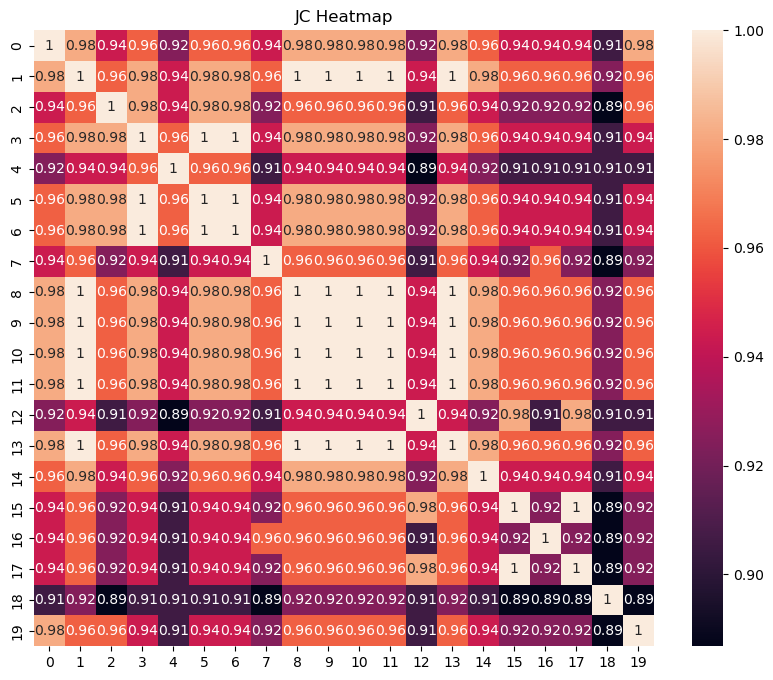

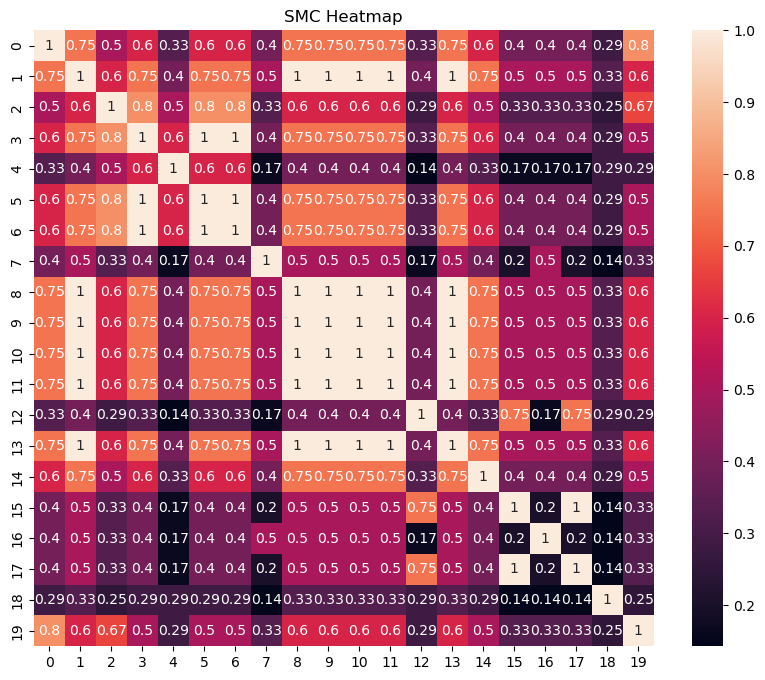

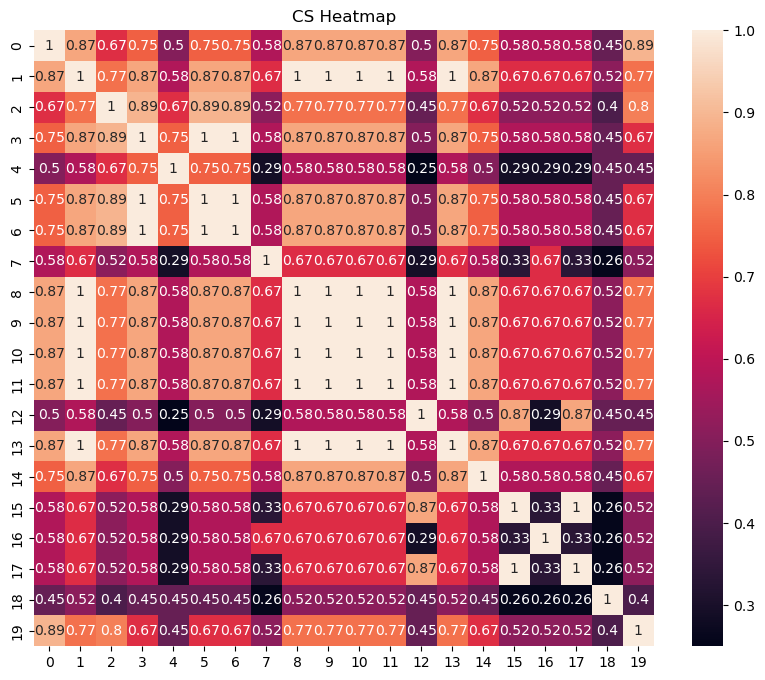

In [161]:
binary_column  = list(change)
data[binary_column] = data[binary_column].replace({'t': 1, 'f': 0})

vect1 = data.loc[0,binary_column].values
vect2 = data.loc[1,binary_column].values
print(vect1)
print(vect2)
def SMC_and_JMC(vec1,vec2):
  f00 , f11 , f01 , f10 = 0 , 0 , 0 ,0
  for i in range(len(vec1)):
    if(vec1[i]==0 and vec2[i]==0):
      f00+=1
    elif(vec1[i] == 1 and vec2[i] == 1):
      f11+=1
    elif(vec1[i] == 0 and vec2[i] ==1):
      f01+=1
    elif(vec1[i] == 1 and vec2[i] == 0):
      f10+=1

  denominator_smc = f00 + f01 + f10 + f11
  denominator_jmc = f11 + f01 + f10
  SMC = (f00 + f11) / denominator_smc if denominator_smc != 0 else 0
  JMC = f11 / denominator_jmc if denominator_jmc != 0 else 0
  return SMC , JMC

SMC , JMC = SMC_and_JMC(vect1,vect2)
print("SMC is ",SMC)
print("JMC is ",JMC)


def cosine_sim(vect1 , vect2):
  dot_product = np.dot(vect1, vect2)
  magnitude_vect1 = np.linalg.norm(vect1)
  magnitude_vect2 = np.linalg.norm(vect2)
  if magnitude_vect1 == 0 or magnitude_vect2 == 0:
        return 0

  CS = dot_product / (magnitude_vect1 * magnitude_vect2)
  return CS
numeric_columns = ["TSH","T3","TT4","T4U","FTI","TBG"]

vect1 = data.loc[0, numeric_columns].values
vect2 = data.loc[1, numeric_columns].values



print("Cosine Similarity : ",cosine_sim(vect1,vect2))
def similarities(data):
  n=len(data)
  jc_matrix = np.zeros((n,n))
  smc_matrix= np.zeros((n,n))
  cosine_matrix = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if i == j:
        jc_matrix[i][j]=1
        smc_matrix[i][j]=1
        cosine_matrix[i][j]=1
      else:
        jc_matrix[i][j],smc_matrix[i][j] = SMC_and_JMC(data[i],data[j])
        cosine_matrix[i][j] = cosine_sim(data[i],data[j])

  return smc_matrix,jc_matrix,cosine_matrix

data[binary_column] = data[binary_column].replace({'t': 1, 'f': 0})

data = data.loc[:19,binary_column].values
smc_matrix , jc_matrix , cosine_matrix = similarities(data)


def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix,annot = True)
    plt.title(title)
    plt.show()

plot_heatmap(jc_matrix, "JC Heatmap")
plot_heatmap(smc_matrix, "SMC Heatmap")
plot_heatmap(cosine_matrix, "CS Heatmap")

